In [ ]:
!pip install ucimlrepo
!pip install optuna

# Student Performance Prediction

- Author  : Muhammad Aditya Bayhaqie
- Assignment : Machine Learning Terapan (Dicoding)

### Data and Library Loading

Memuat Pustaka

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Mengimpor Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [ ]:
# variable information
display(predict_students_dropout_and_academic_success.variables)
# After the information displayed, it is advised if you see it on table view if you use google collab

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


**Dari deskripsi data yang tersedia, dapat disimpulkan bahwa hanya terdapat lima fitur dengan tipe data kontinu yang dapat dianalisis lebih lanjut, khususnya untuk keperluan deteksi outlier.**

Namun demikian, fitur-fitur seperti **`Inflation rate`**, **`GDP`**, dan **`Unemployment Rate`** tidak akan disertakan dalam proses analisis dan pemodelan karena dianggap **tidak memiliki keterkaitan langsung dengan prediksi performa siswa**. Ketiga fitur tersebut merepresentasikan kondisi makroekonomi yang cakupannya lebih luas dan tidak secara spesifik memengaruhi variabel target dalam konteks ini.

In [ ]:
# load the dataset
url = 'https://archive.ics.uci.edu/static/public/697/data.csv'
students = pd.read_csv(url)
students

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
null_counts = students.isnull().sum()

# Print the null counts
print(null_counts)

# Total number of null values in the DataFrame
total_nulls = null_counts.sum()
print(f"\nTotal number of null values: {total_nulls}")

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Data yang telah dimuat berada dalam kondisi yang bersih. Tahapan selanjutnya adalah melakukan *Exploratory Data Analysis* (EDA) guna memahami karakteristik data secara lebih mendalam.

### Exploratory Data Analysis

In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Data telah berada dalam kondisi yang baik, dengan format setiap fitur yang sudah sesuai dan siap untuk dianalisis lebih lanjut.

In [ ]:
students.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Identifikasi Outlier  
Langkah selanjutnya adalah mengidentifikasi **outlier** pada fitur-fitur kontinu yang telah ditentukan sebelumnya berdasarkan hasil deskripsi data. Proses ini bertujuan untuk memastikan tidak terdapat nilai ekstrem yang dapat memberikan pengaruh signifikan terhadap hasil analisis atau pemodelan.

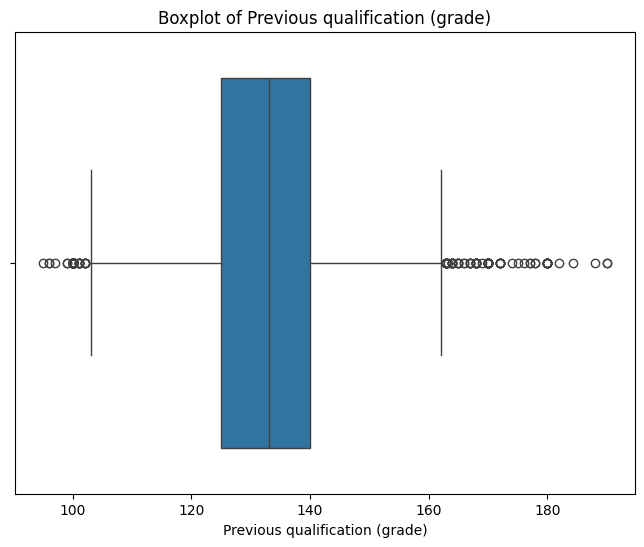

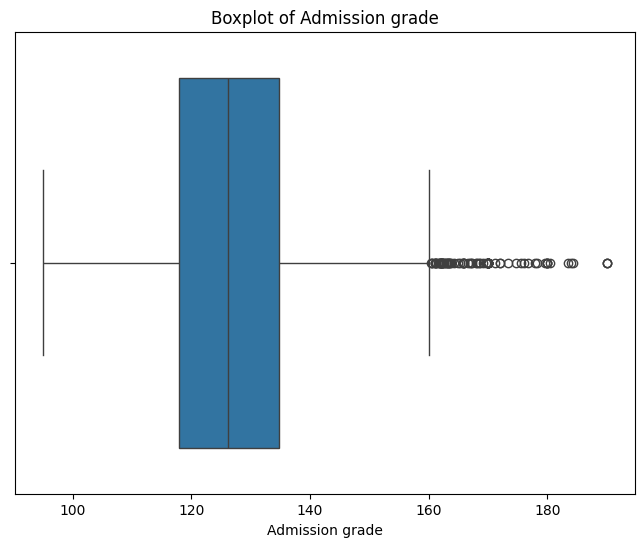

In [ ]:
specific_cols = ['Previous qualification (grade)', 'Admission grade']
for col in specific_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=students[col])  # Using students[col] to access data
    plt.title(f'Boxplot of {col}')
    plt.show()

Terdapat sejumlah outlier pada data kontinu yang telah dianalisis. Oleh karena itu, data yang terindikasi sebagai outlier akan dihapus dengan menggunakan parameter yang telah ditentukan, guna menjaga kualitas dan akurasi hasil analisis selanjutnya.

In [ ]:
# Specify the columns to check for outliers
cols_to_check = ['Previous qualification (grade)', 'Admission grade']

# Calculate quantiles and IQR for the specified columns only
Q1 = students[cols_to_check].quantile(0.25)
Q3 = students[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

# Filter the dataset to remove outliers in the specified columns
filtered_students = students[~((students[cols_to_check] < (Q1 - 1.5 * IQR)) | (students[cols_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the filtered dataset
print(filtered_students.shape)

(4201, 37)


#### Univariate Analysis
Analisis dilakukan secara terpisah berdasarkan jenis data, yaitu data kategorikal dan data numerikal. Langkah ini bertujuan untuk memahami distribusi dan karakteristik masing-masing fitur secara individu sebelum dilakukan analisis lebih lanjut.

In [ ]:
categorical_features = students.select_dtypes(include='object').columns.tolist()

numerical_features   = students.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features   = [col for col in numerical_features if col != 'Id' and col != 'SalePrice']

discrete_features    = [col for col in numerical_features if len(students[col].unique()) < 25]
continuous_feature  = [col for col in numerical_features if col not in discrete_features]

print(f'Number of Categorical Feature : {len(categorical_features)}')
print(f'Number of Numerical Feature   : {len(numerical_features)}')
print(f'Number of Discrete Feature    : {len(discrete_features)}')
print(f'Number of Continous Feature   : {len(continuous_feature)}')

Number of Categorical Feature : 1
Number of Numerical Feature   : 36
Number of Discrete Feature    : 25
Number of Continous Feature   : 11


In [ ]:
display(continuous_feature)

['Previous qualification (grade)',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)']

Data pada fitur kontinu merupakan hasil dari proses encoding sebelumnya. Fitur kontinu asli yang digunakan sejak awal adalah **`Previous qualification (grade)`** dan **`Admission grade`**, di mana data outlier pada kedua fitur tersebut telah dihapus pada tahap sebelumnya.

---

**Analisis Fitur Kategorikal**  
Selanjutnya, dilakukan analisis terhadap fitur-fitur kategorikal untuk memahami distribusi nilai dan potensi insight yang dapat diperoleh dari masing-masing kategori.

##### Categorical Features

          Jumlah Sampel  Persentase
Target                             
Graduate           2209        49.9
Dropout            1421        32.1
Enrolled            794        17.9


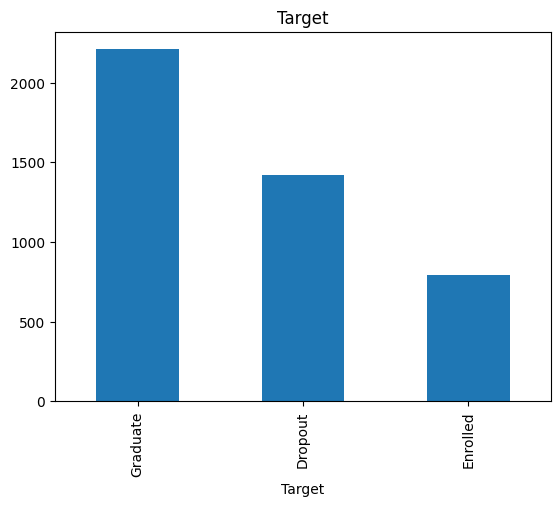

In [ ]:
feature = categorical_features[0]
count = students[feature].value_counts()
percent = 100*students[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Data menunjukkan bahwa mayoritas siswa berada pada kategori `Graduate`, yang mengindikasikan tingkat kelulusan yang relatif tinggi dalam populasi tersebut. Hal ini mencerminkan keberhasilan akademik yang dominan di antara siswa dalam dataset.

##### Fitur Numerik  
Selanjutnya, dilakukan analisis terhadap fitur-fitur numerik untuk memahami distribusi, kecenderungan pusat, serta potensi nilai ekstrem yang mungkin memengaruhi hasil analisis secara keseluruhan.

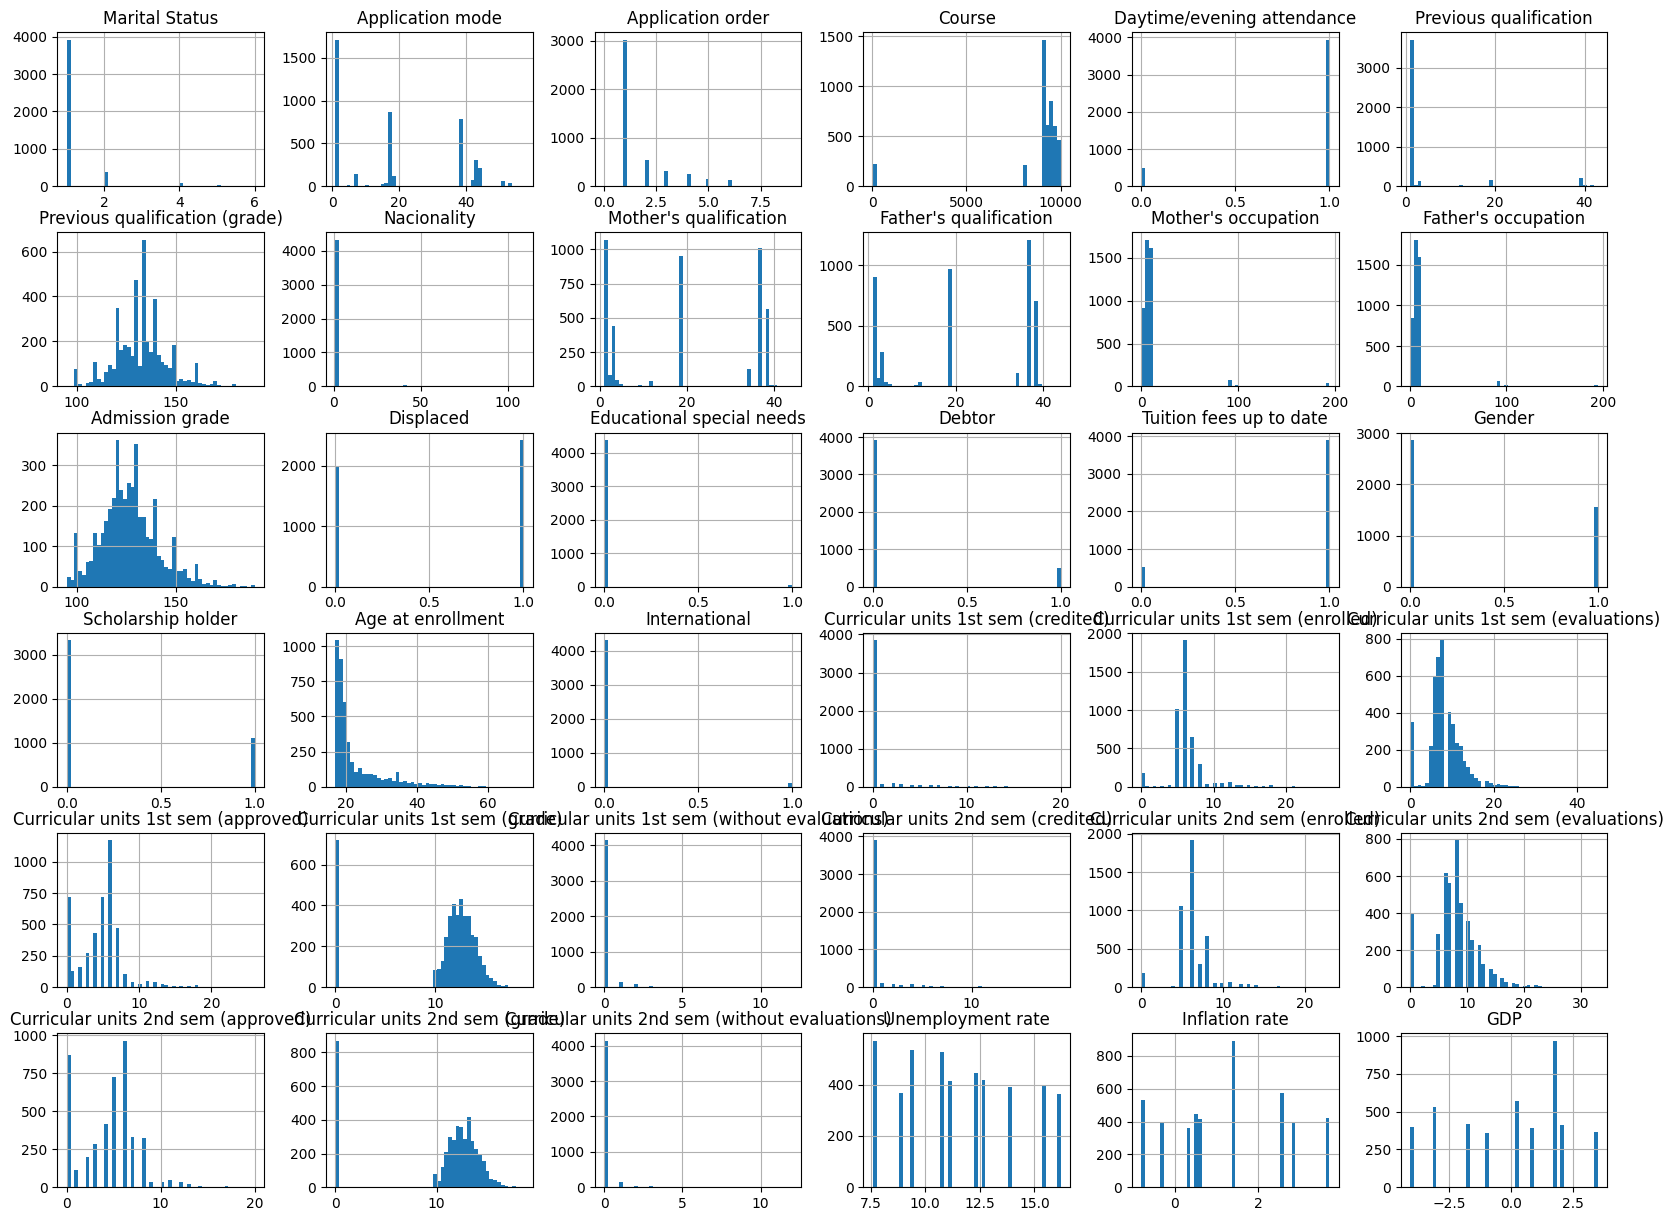

In [ ]:
students.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
skewness = students[numerical_features].skew().sort_values(ascending=False)

avg_skewness = skewness
avg_skewness = avg_skewness.sort_values(ascending=False)

print(avg_skewness)

Nacionality                                       10.703998
Educational special needs                          9.154976
Curricular units 1st sem (without evaluations)     8.207403
Curricular units 2nd sem (without evaluations)     7.267701
International                                      6.104830
Father's occupation                                5.395173
Mother's occupation                                5.339227
Curricular units 2nd sem (credited)                4.634820
Marital Status                                     4.399764
Curricular units 1st sem (credited)                4.169049
Previous qualification                             2.871207
Debtor                                             2.434652
Age at enrollment                                  2.054988
Application order                                  1.881050
Curricular units 1st sem (enrolled)                1.619041
Scholarship holder                                 1.164871
Curricular units 1st sem (evaluations)  

Informasi yang dapat diperoleh dari analisis awal adalah sebagai berikut:  
- Fitur-fitur kontinu cenderung memiliki distribusi *middle-skewed* atau sedikit miring ke satu sisi.  
- Persebaran data pada fitur lainnya bersifat cukup acak, hal ini disebabkan oleh sebagian besar data numerik yang tersedia merupakan hasil *encoding* dari variabel kategorikal.

#### Multivariate Analysis  
Analisis multivariat dilakukan untuk mengidentifikasi hubungan atau keterkaitan antara fitur-fitur dalam dataset.

##### Categorical Features  
Karena hanya terdapat satu fitur kategorikal, analisis akan difokuskan pada fitur-fitur numerik.

##### Numerical Features  
Selanjutnya, dilakukan analisis keterkaitan antar fitur numerik yang terdapat dalam data.

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(students, diag_kind = 'kde')


##### Visualisasi Korelasi  
Analisis dilanjutkan dengan pemanfaatan visualisasi berupa _heatmap_ untuk menggambarkan korelasi antar fitur numerik secara menyeluruh.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

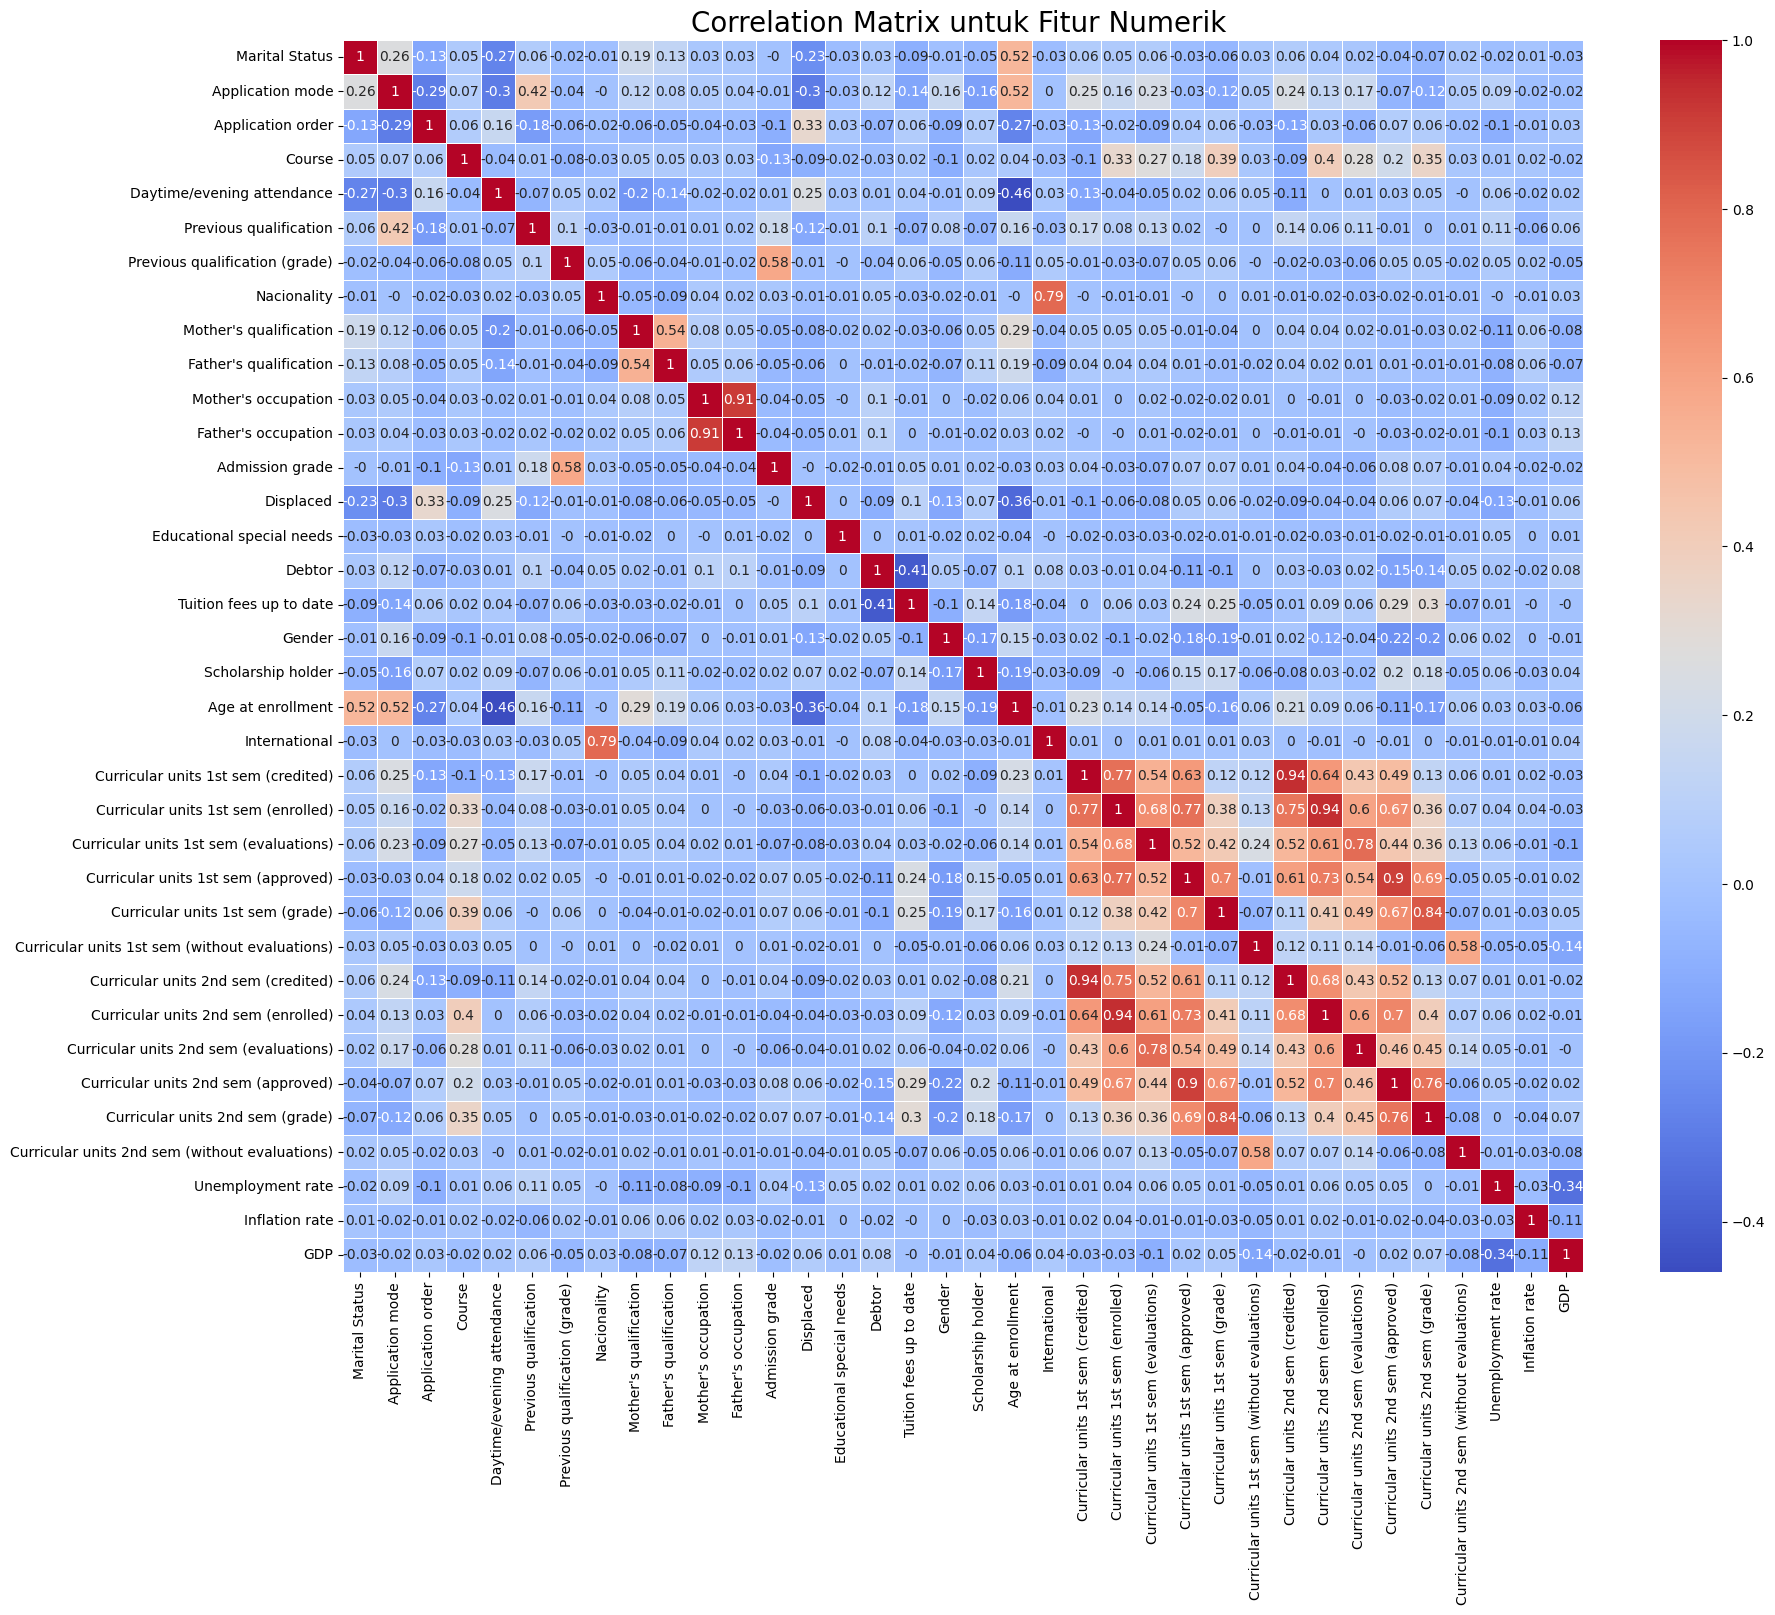

In [ ]:
plt.figure(figsize=(20, 16))
correlation_matrix = students[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

#### Kesimpulan Hasil Analisis Korelasi  
Berdasarkan hasil dari dua visualisasi yang digunakan, dapat disimpulkan beberapa hal berikut:  
- Fitur dengan awalan `Curricular units 1st` dan `Curricular units 2nd` menunjukkan tingkat korelasi yang tinggi.  
- Fitur-fitur dengan korelasi rendah terhadap fitur lainnya antara lain:
  - Marital Status  
  - Nationality  
  - Displaced  
  - Father's Occupation  
  - Mother's Occupation  
  - International  
  - Unemployment Rate  
  - Inflation Rate  
  - GDP  

  Fitur-fitur tersebut akan dipertimbangkan untuk dihapus karena kontribusi informasinya yang rendah.

- Terdapat beberapa fitur yang memiliki korelasi tinggi satu sama lain, di antaranya:
  - Previous Qualification dan Admission Grade  
  - Age at Enrollment dan Scholarship Holder  

  Untuk fitur-fitur ini, akan dipertimbangkan untuk menghapus salah satu atau melakukan reduksi dimensi guna menghindari redundansi informasi.

In [ ]:
# Drop specified features
features_to_drop = ['Marital status', 'Nationality', 'Displaced', "Father's occupation", "Mother's occupation", 'International', 'Unemployment rate', 'Inflation rate', 'GDP']
students = students.drop(columns=features_to_drop, errors='ignore')

# Show the first few rows of the modified DataFrame
display(students)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,5,13.600000,0,0,6,8,5,12.666667,0,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,12.000000,0,0,6,6,2,11.000000,0,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,7,14.912500,0,0,8,9,1,13.500000,0,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,13.800000,0,0,5,6,5,12.000000,0,Graduate


Buat fitur `Previous Qualification` & `Admission Grade`, bakalan kita drop salah satunya, in this case, we will drop `Previous Qualification`

In [ ]:
# Drop specified features
features_to_drop = ['Previous qualification (grade)']
students = students.drop(columns=features_to_drop, errors='ignore')

# Show the first few rows of the modified DataFrame
display(students)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target,Curricular_Units_PCA_1,Curricular_Units_PCA_2,Curricular_Units_PCA_3
0,1,17,5,171,1,1,1,19,12,127.3,0,0,1,1,0,20,Dropout,-5.436567,-0.986890,-1.263305
1,1,15,1,9254,1,1,1,1,3,142.5,0,0,0,1,0,19,Graduate,0.085205,1.224100,0.174347
2,1,1,5,9070,1,1,1,37,37,124.8,0,0,0,1,0,19,Dropout,-3.589884,-1.621948,-1.827477
3,1,17,2,9773,1,1,1,38,37,119.6,0,0,1,0,0,20,Graduate,0.325992,0.884045,0.357028
4,2,39,1,8014,0,1,1,37,38,141.5,0,0,1,0,0,45,Graduate,0.064950,0.867917,0.161256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,1,1,1,122.2,0,0,1,1,0,19,Graduate,0.007084,0.923912,0.251081
4420,1,1,2,9773,1,1,105,1,1,119.0,0,1,0,0,0,18,Dropout,-0.602310,0.528647,-0.094943
4421,1,1,1,9500,1,1,1,37,37,149.5,0,0,1,0,1,30,Dropout,0.516630,0.716283,0.285004
4422,1,1,1,9147,1,1,1,37,37,153.8,0,0,1,0,1,20,Graduate,-0.618109,1.081304,0.144812


### Data Preparation

#### Dimension Reduction with Principal Component Analysis (PCA)
Seperti yang kita analisa sebelumnya, fitur dengan nama`Curricular units 1st` dan `Curricular units 2nd` akan kita gabungkan menggunakan **PCA** secara terpisah

Curricular units 1st

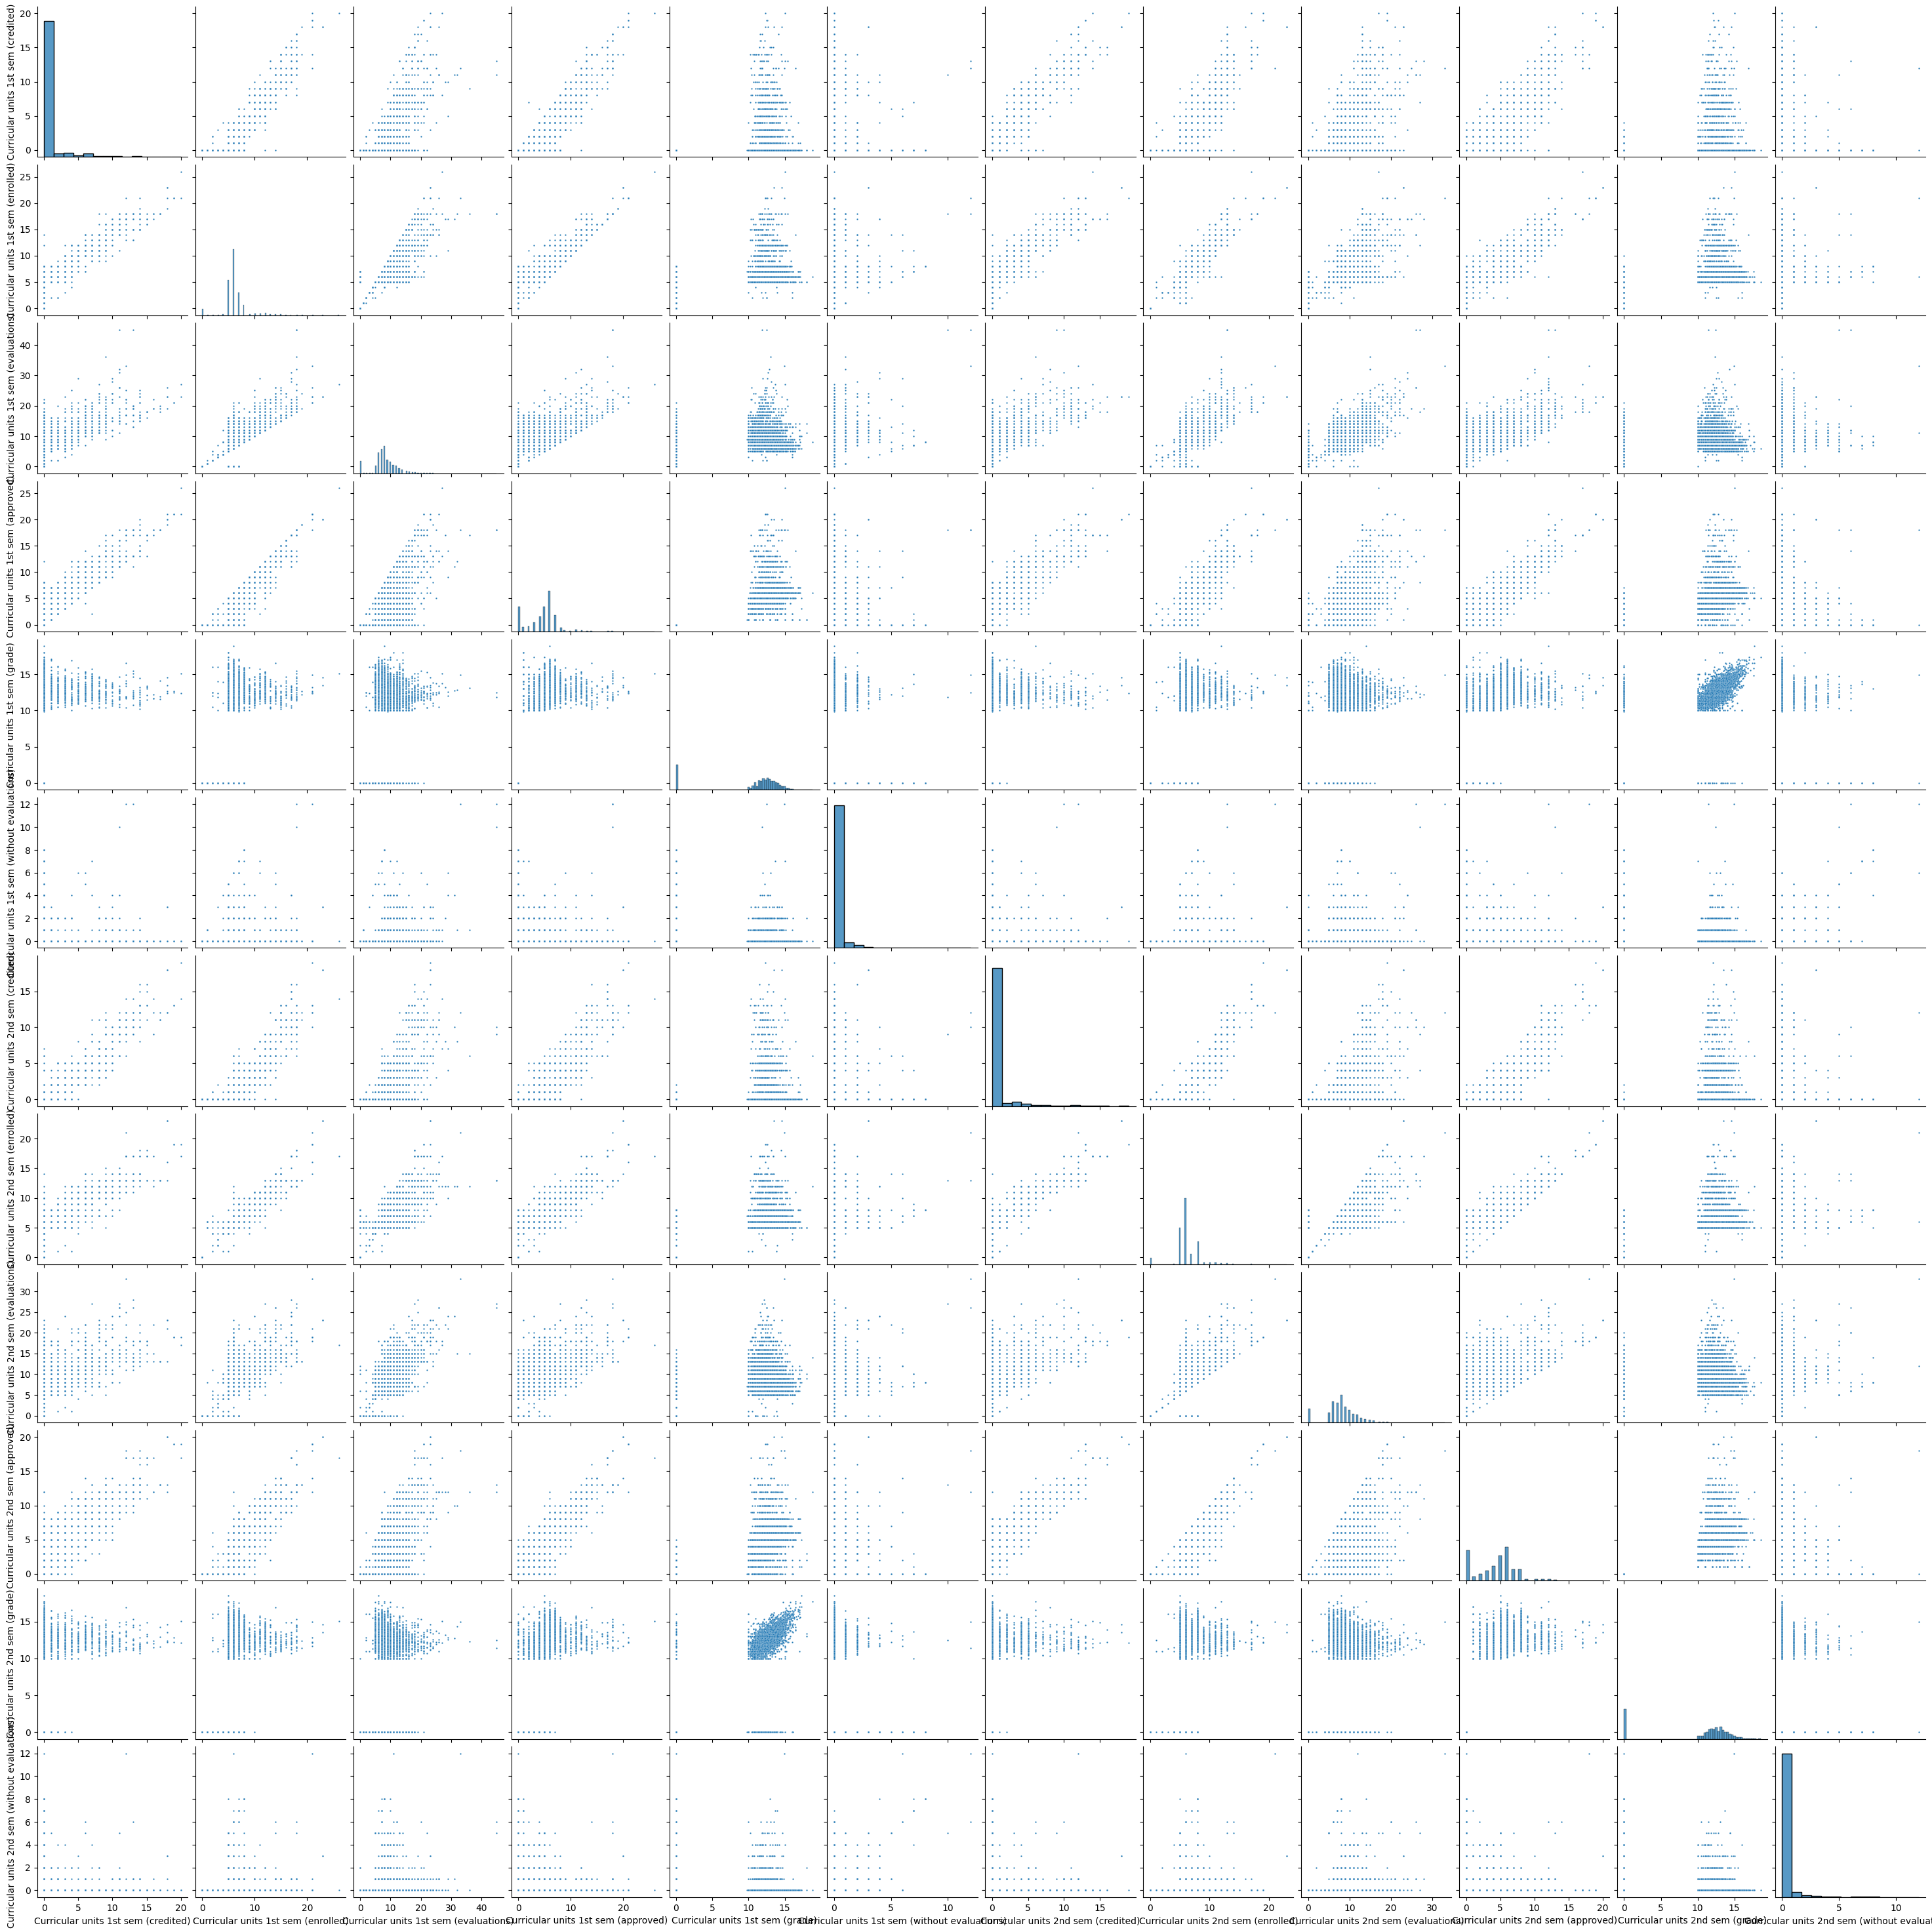

In [ ]:
# Select columns for PCA
curricular_units_1st_cols = [col for col in students.columns if 'Curricular units 1st' in col]
curricular_units_2nd_cols = [col for col in students.columns if 'Curricular units 2nd' in col]

# Create a DataFrame with selected columns
curricular_units_data = students[curricular_units_1st_cols + curricular_units_2nd_cols]

# Visualize relationships using pairplot
sns.pairplot(curricular_units_data, plot_kws={"s": 3});

Dari data ini, kita bisa liat adanya keterkaitan positif antar fitur yang akan direduksi

In [ ]:
# Scale the data before applying PCA
scaler = StandardScaler()
curricular_units_scaled = scaler.fit_transform(curricular_units_data)

In [ ]:
# Apply PCA with 3 components (adjust as needed)
pca = PCA(n_components=7, random_state=123)
pca.fit(curricular_units_scaled)
principal_components = pca.transform(curricular_units_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_.round(2)
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.51 0.17 0.12 0.07 0.04 0.03 0.02]


Dari hasil PCA ini, kita bisa nyimpulin bahwa 3 Component pertama memiliki Ratio mencapai 90%

Maka step yang akan kita lakukan ialah :

- Gunakan n_component = 3, karena kita bakalan ekstrak 3 Komponen untuk reduksi data.
- Fit model dengan data masukan.
- Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
- Drop kolom dengan nama `Curricular units 1st` dan `Curricular units 2nd`

In [ ]:
# Create new columns in the 'students' DataFrame for principal components
for i in range(3):
    students[f'Curricular_Units_PCA_{i+1}'] = principal_components[:, i]

# Drop the original Curricular units columns
students = students.drop(columns=curricular_units_1st_cols + curricular_units_2nd_cols)

In [ ]:
display(students)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target,Curricular_Units_PCA_1,Curricular_Units_PCA_2,Curricular_Units_PCA_3
0,1,17,5,171,1,1,1,19,12,127.3,0,0,1,1,0,20,Dropout,-5.436567,-0.986890,-1.263305
1,1,15,1,9254,1,1,1,1,3,142.5,0,0,0,1,0,19,Graduate,0.085205,1.224100,0.174347
2,1,1,5,9070,1,1,1,37,37,124.8,0,0,0,1,0,19,Dropout,-3.589884,-1.621948,-1.827477
3,1,17,2,9773,1,1,1,38,37,119.6,0,0,1,0,0,20,Graduate,0.325992,0.884045,0.357028
4,2,39,1,8014,0,1,1,37,38,141.5,0,0,1,0,0,45,Graduate,0.064950,0.867917,0.161256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,1,1,1,122.2,0,0,1,1,0,19,Graduate,0.007084,0.923912,0.251081
4420,1,1,2,9773,1,1,105,1,1,119.0,0,1,0,0,0,18,Dropout,-0.602310,0.528647,-0.094943
4421,1,1,1,9500,1,1,1,37,37,149.5,0,0,1,0,1,30,Dropout,0.516630,0.716283,0.285004
4422,1,1,1,9147,1,1,1,37,37,153.8,0,0,1,0,1,20,Graduate,-0.618109,1.081304,0.144812


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Next, untuk `Age at Enrollment` & `Scholarship Holder`

Fitur ini punya makna yang berbeda, so we let it be

#### Train-Test-Split
Disini kita bakal ngambil Ratio 8:2

In [ ]:
X = students.drop(["Target"],axis =1)
y = students["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4424
Total # of sample in train dataset: 3981
Total # of sample in test dataset: 443


#### Standarization

In [ ]:
# Identify numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
display(X_train[numerical_features])


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular_Units_PCA_1,Curricular_Units_PCA_2,Curricular_Units_PCA_3
4187,1.396814,1.165734,-0.554263,-0.398241,-2.836852,-0.344829,-0.126595,1.116646,1.026131,0.517669,-0.110474,-0.353404,0.364992,-0.731229,-0.573386,0.632588,-0.010105,0.600389,0.080172
4212,-0.290809,-0.094353,0.204252,0.443516,0.352503,-0.344829,-0.126595,-1.190738,-1.391780,-0.791892,-0.110474,-0.353404,0.364992,-0.731229,-0.573386,-0.557926,0.043228,0.873345,0.154510
684,4.772058,1.165734,-0.554263,0.075038,0.352503,1.436826,-0.126595,1.116646,0.960782,-1.179910,-0.110474,-0.353404,0.364992,1.367561,-0.573386,3.410453,2.081354,-0.869383,-0.720599
387,-0.290809,1.165734,-0.554263,0.547839,-2.836852,-0.146868,-0.126595,1.116646,0.960782,1.328349,-0.110474,-0.353404,0.364992,-0.731229,-0.573386,0.632588,2.643490,-1.355488,-1.847940
2585,-0.290809,-0.094353,0.204252,-0.398241,-2.836852,-0.344829,-0.126595,1.116646,0.764735,-0.653314,-0.110474,-0.353404,0.364992,-0.731229,-0.573386,-0.557926,0.008228,0.557308,0.099833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.290809,-1.010780,0.962767,-4.151458,0.352503,-0.344829,-0.126595,1.180740,0.960782,0.018789,-0.110474,2.829627,-2.739783,1.367561,1.744025,-0.557926,-2.179297,-0.690669,-1.043564
4060,-0.290809,-0.781673,-0.554263,0.135813,0.352503,-0.344829,-0.126595,-0.934362,1.352876,1.570861,-0.110474,-0.353404,0.364992,-0.731229,-0.573386,-0.690205,0.081658,0.984151,0.242385
1346,-0.290809,-0.094353,1.721281,0.443516,0.352503,-0.344829,-0.126595,-1.190738,-1.391780,-0.459305,-0.110474,-0.353404,0.364992,-0.731229,1.744025,-0.690205,-0.000689,0.744791,0.056582
3454,-0.290809,-0.094353,-0.554263,0.143948,0.352503,-0.344829,-0.126595,1.116646,0.960782,-1.228412,-0.110474,-0.353404,-2.739783,-0.731229,-0.573386,-0.161088,-0.393137,-0.463980,0.817254


In [ ]:
X_train[numerical_features].describe().round(4)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular_Units_PCA_1,Curricular_Units_PCA_2,Curricular_Units_PCA_3
count,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000,3981.0000
mean,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-0.2908,-1.0108,-1.3128,-4.2175,-2.8369,-0.3448,-0.1266,-1.1907,-1.3918,-2.2192,-0.1105,-0.3534,-2.7398,-0.7312,-0.5734,-0.8225,-2.1793,-11.6766,-5.0376
25%,-0.2908,-1.0108,-0.5543,0.1143,0.3525,-0.3448,-0.1266,-1.1266,-1.2611,-0.6256,-0.1105,-0.3534,0.3650,-0.7312,-0.5734,-0.5579,-0.2796,-0.6167,-0.3471
50%,-0.2908,-0.0944,-0.5543,0.1875,0.3525,-0.3448,-0.1266,-0.0370,-0.2155,-0.0574,-0.1105,-0.3534,0.3650,-0.7312,-0.5734,-0.4256,0.0299,0.3722,0.1356
75%,-0.2908,1.1657,0.2043,0.3397,0.3525,-0.3448,-0.1266,1.1166,0.9608,0.5454,-0.1105,-0.3534,0.3650,1.3676,-0.5734,0.2358,0.3079,0.6725,0.2812
max,8.1473,1.9676,5.5139,0.5478,0.3525,3.8124,15.3495,1.5653,1.4182,4.3632,9.0519,2.8296,0.3650,1.3676,1.7440,6.1883,6.6489,1.3140,12.3155


### Model Development

Kita akan membuat tiga buah model machine learning dangan algoritma berikut:

- Gradient Boosting (Dalam Hal ini kita bakalan pake XGBoost)
- Logistic Regression
- SVM
- KNN
- Random Forest

**Gradient Boosting (GBM)**  
Gradient Boosting bekerja dengan membangun model secara bertahap, di mana setiap model baru mencoba memperbaiki kesalahan model sebelumnya. Model ini menggunakan pendekatan boosting, yaitu menggabungkan beberapa pohon keputusan lemah (weak learners) menjadi model yang lebih kuat. GBM sangat efektif dalam menangani data tabular dan sering digunakan dalam kompetisi machine learning karena kemampuannya dalam menangkap pola yang kompleks.

In [ ]:
# Gradient Boosting (XGBoost alternative)
gb = GradientBoostingClassifier(random_state=123)  # You can tune hyperparameters
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)

**Logistic Regression**  
Logistic Regression adalah model statistik yang digunakan untuk memprediksi probabilitas suatu peristiwa berdasarkan variabel input. Model ini bekerja dengan menggunakan fungsi sigmoid untuk mengubah hasil regresi linear menjadi nilai probabilitas antara 0 dan 1. Logistic Regression cocok digunakan dalam kasus klasifikasi biner seperti memprediksi apakah seorang siswa akan lulus atau tidak.

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=123)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

**Support Vector Machine (SVM)**  
SVM bekerja dengan mencari hyperplane terbaik yang dapat memisahkan kelas-kelas dalam data. Model ini menggunakan konsep margin maksimal, yaitu memilih hyperplane yang memiliki jarak terjauh dari titik-titik terdekat dari setiap kelas. Jika data tidak dapat dipisahkan secara linear, SVM dapat menggunakan kernel trick untuk mengubah data ke dimensi yang lebih tinggi agar lebih mudah dipisahkan. SVM sangat efektif dalam menangani data yang tidak terstruktur dan memiliki distribusi yang kompleks.

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel="rbf", random_state=123)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

**Random Forest**

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Apa itu model ensemble? Sederhananya, ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama.

In [ ]:
# buat model prediksi
RF = RandomForestClassifier(n_estimators= 474, max_depth= 20, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
RF_predictions = RF.predict(X_test)

### Evaluation

Pertama, mari kita Scale dulu datanya agar tidak terjadi kebocoran data

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Evaluate using classification metrics
# Buat variabel scores yang isinya adalah dataframe nilai accuracy, precision, recall, f1 score data train dan test pada masing-masing algoritma
scores = pd.DataFrame(columns=['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 'train_recall', 'test_recall', 'train_f1', 'test_f1'], index=['GB','LG','SVM'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'GB': gb, 'LG': logreg, 'SVM': svm, 'RF': RF}

# Hitung metrik evaluasi masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    scores.loc[name, 'train_accuracy'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    scores.loc[name, 'test_accuracy'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
    scores.loc[name, 'train_precision'] = precision_score(y_true=y_train, y_pred=model.predict(X_train), average='weighted')
    scores.loc[name, 'test_precision'] = precision_score(y_true=y_test, y_pred=model.predict(X_test), average='weighted')
    scores.loc[name, 'train_recall'] = recall_score(y_true=y_train, y_pred=model.predict(X_train), average='weighted')
    scores.loc[name, 'test_recall'] = recall_score(y_true=y_test, y_pred=model.predict(X_test), average='weighted')
    scores.loc[name, 'train_f1'] = f1_score(y_true=y_train, y_pred=model.predict(X_train), average='weighted')
    scores.loc[name, 'test_f1'] = f1_score(y_true=y_test, y_pred=model.predict(X_test), average='weighted')

# Print the scores
display(scores)

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
GB,0.814619,0.778781,0.808429,0.765238,0.814619,0.778781,0.80648,0.770266
LG,0.72846,0.756208,0.698806,0.723431,0.72846,0.756208,0.692738,0.72196
SVM,0.762622,0.749436,0.753411,0.728613,0.762622,0.749436,0.736019,0.71782
RF,1.0,0.760722,1.0,0.739726,1.0,0.760722,1.0,0.745133


Model RF cenderung Overfitting, Mari kita lihat lebih detail untuk hasil tiap model

In [ ]:
# Print classification report for each model
for name, model in model_dict.items():
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, model.predict(X_test)))

Classification Report for GB:
              precision    recall  f1-score   support

     Dropout       0.80      0.80      0.80       146
    Enrolled       0.48      0.37      0.42        73
    Graduate       0.84      0.90      0.87       224

    accuracy                           0.78       443
   macro avg       0.71      0.69      0.69       443
weighted avg       0.77      0.78      0.77       443

Classification Report for LG:
              precision    recall  f1-score   support

     Dropout       0.80      0.77      0.79       146
    Enrolled       0.46      0.15      0.23        73
    Graduate       0.76      0.94      0.84       224

    accuracy                           0.76       443
   macro avg       0.67      0.62      0.62       443
weighted avg       0.72      0.76      0.72       443

Classification Report for SVM:
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.77       146
    Enrolled       0.54      0.18     

Based on F1 Score, Gradient Boosting memiliki Tingkat akurasi yang jauh lebih tinggi, namun belum menjadi model yang baik karena akurasinya yang belum memuaskan

In [ ]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'GB_Prediction': gb_predictions,
                             'LogReg_Prediction': logreg_predictions, 'SVM_Prediction': svm_predictions, 'RF_Prediction': RF_predictions})

# Display the comparison table
comparison_df

,Actual,GB_Prediction,LogReg_Prediction,SVM_Prediction,RF_Prediction
3781,Graduate,Graduate,Graduate,Graduate,Graduate
3357,Dropout,Dropout,Dropout,Dropout,Dropout
2007,Graduate,Graduate,Graduate,Graduate,Graduate
3863,Graduate,Graduate,Graduate,Graduate,Graduate
4005,Dropout,Dropout,Dropout,Dropout,Dropout
...,...,...,...,...,...
3060,Enrolled,Graduate,Graduate,Graduate,Graduate
1495,Graduate,Graduate,Graduate,Graduate,Graduate
738,Enrolled,Graduate,Graduate,Enrolled,Graduate
2754,Dropout,Dropout,Dropout,Graduate,Graduate
